In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [4]:
penguins = pd.read_csv('penguins.csv')

In [5]:
print(penguins.info())
print(penguins.describe())
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
penguins.dropna(inplace=True)

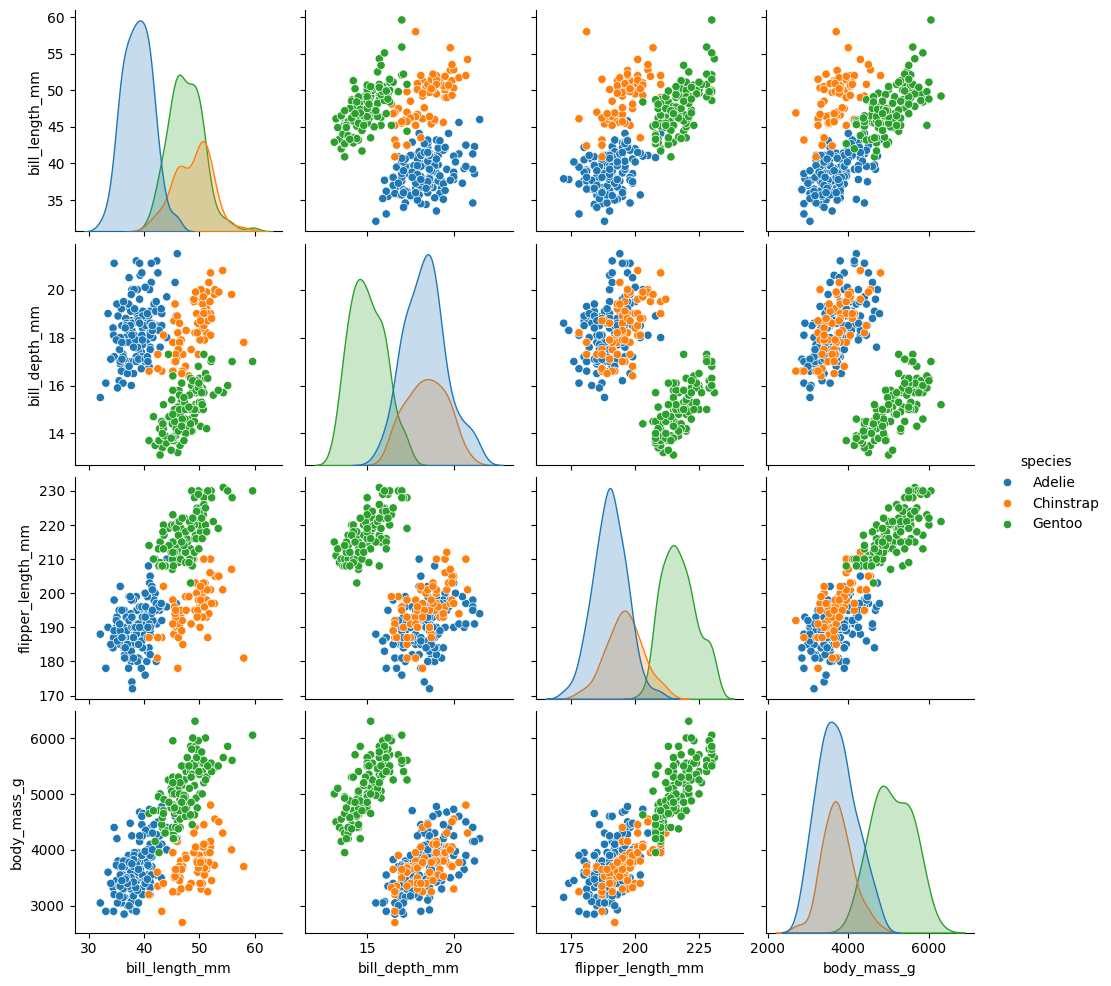

In [8]:
sns.pairplot(penguins, hue='species')
plt.show()

In [9]:
categorical_columns = penguins.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['species', 'island', 'sex']

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    penguins[col] = label_encoder.fit_transform(penguins[col])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,0
340,2,0,46.8,14.3,215.0,4850.0,0
341,2,0,50.4,15.7,222.0,5750.0,1
342,2,0,45.2,14.8,212.0,5200.0,0


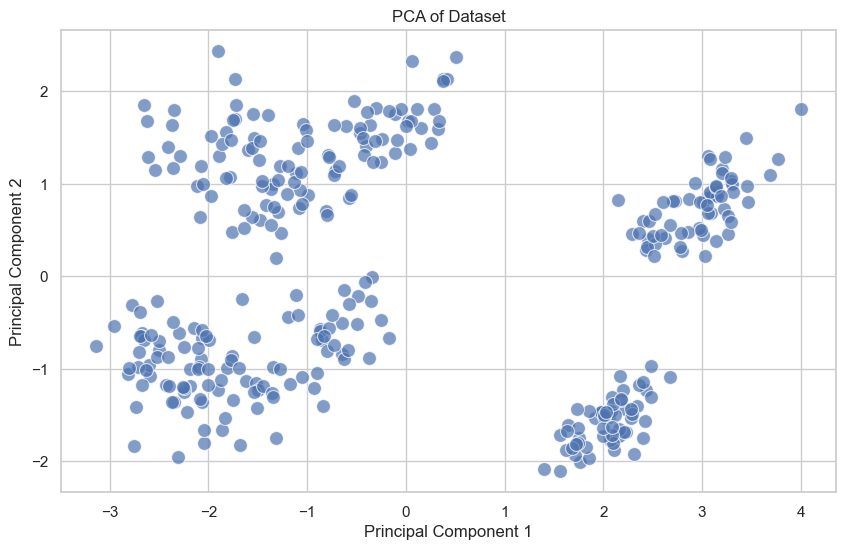

In [11]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(penguins)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
df2 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df2, s=100, alpha=0.7)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [12]:
X = penguins.drop(columns=['species'])
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'])
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.889392,-0.896042,0.780732,-1.426752,-0.568475,0.991031
1,1.889392,-0.822788,0.119584,-1.069474,-0.506286,-1.009050
2,1.889392,-0.676280,0.424729,-0.426373,-1.190361,-1.009050
3,1.889392,-1.335566,1.085877,-0.569284,-0.941606,-1.009050
4,1.889392,-0.859415,1.747026,-0.783651,-0.692852,0.991031
...,...,...,...,...,...,...
328,-0.913136,0.587352,-1.762145,0.931283,0.892957,-1.009050
329,-0.913136,0.514098,-1.457000,1.002739,0.799674,-1.009050
330,-0.913136,1.173384,-0.744994,1.502928,1.919069,0.991031
331,-0.913136,0.221082,-1.202712,0.788372,1.234995,-1.009050


In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
penguins['kmeans_cluster'] = kmeans.labels_

C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
penguins['agg_cluster'] = agg.labels_

Text(0.5, 1.0, 'Agglomerative Clustering')

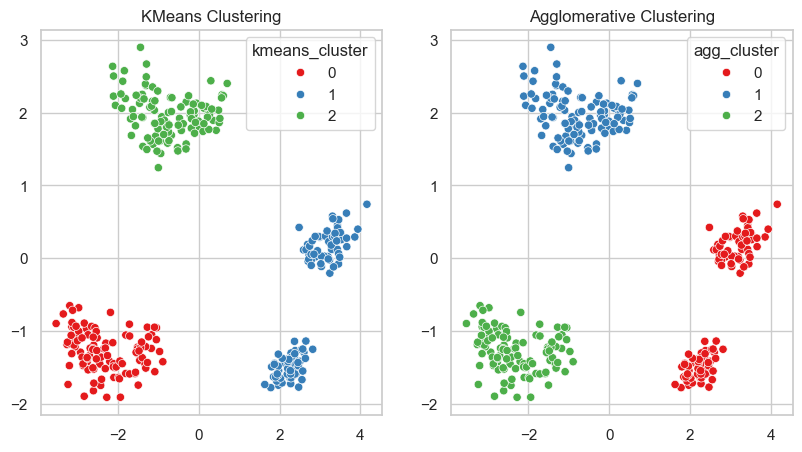

In [16]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins)
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_scaled)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=penguins_pca[:,0], y=penguins_pca[:,1], hue=penguins['kmeans_cluster'], palette='Set1', legend='full')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x=penguins_pca[:,0], y=penguins_pca[:,1], hue=penguins['agg_cluster'], palette='Set1', legend='full')
plt.title('Agglomerative Clustering')

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
penguins['dbscan_cluster'] = dbscan.fit_predict(X)


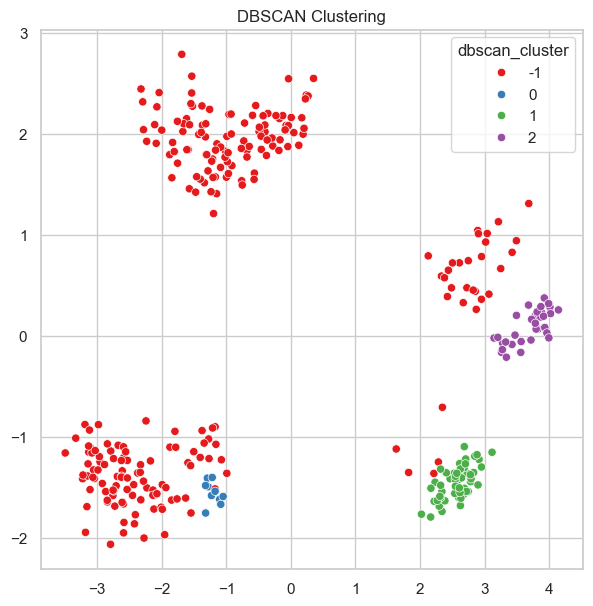

In [18]:
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins)
pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(penguins_scaled)
plt.figure(figsize=(7, 7))

sns.scatterplot(x=penguins_pca[:,0], y=penguins_pca[:,1], hue=penguins['dbscan_cluster'], palette='Set1', legend='full')
plt.title('DBSCAN Clustering')
plt.show()

In [19]:
k_values = [2, 3, 4, 5, 6, 7, 8]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    jaccards_similarity = jaccard_score(np.array(penguins['species']), kmeans.labels_, average='macro')
    db_score = davies_bouldin_score(X, kmeans.labels_)
    print(f"\nFor k = {k}, the average silhouette score is: {silhouette_avg}, Jaccard's Similarity: {jaccards_similarity}, Davies-Bouldin Score: {db_score}")


For k = 2, the average silhouette score is: 0.4363258747905643, Jaccard's Similarity: 0.22741433021806853, Davies-Bouldin Score: 0.9546782044112441

For k = 3, the average silhouette score is: 0.4110117788705368, Jaccard's Similarity: 0.13518518518518519, Davies-Bouldin Score: 1.0969425096047718

For k = 4, the average silhouette score is: 0.4499727715893849, Jaccard's Similarity: 0.22954014939309056, Davies-Bouldin Score: 0.9178658224019627

For k = 5, the average silhouette score is: 0.4472636052401441, Jaccard's Similarity: 0.08295454545454546, Davies-Bouldin Score: 0.9172449834105489

For k = 6, the average silhouette score is: 0.4281732958526395, Jaccard's Similarity: 0.02420856610800745, Davies-Bouldin Score: 1.0146250490789939

For k = 7, the average silhouette score is: 0.46385804193409735, Jaccard's Similarity: 0.0, Davies-Bouldin Score: 0.8560282930787689

For k = 8, the average silhouette score is: 0.49082767346980444, Jaccard's Similarity: 0.02054794520547945, Davies-Bould

C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

In [20]:
eps_values = [0.2, 0.5, 1.0]
min_samples_values = [3, 5, 10]
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        n_clusters = len(set(dbscan.labels_))
        print(f"\nFor eps = {eps} and min_samples = {min_samples}, the number of clusters found by DBSCAN is: {n_clusters}")


For eps = 0.2 and min_samples = 3, the number of clusters found by DBSCAN is: 3

For eps = 0.2 and min_samples = 5, the number of clusters found by DBSCAN is: 1

For eps = 0.2 and min_samples = 10, the number of clusters found by DBSCAN is: 1

For eps = 0.5 and min_samples = 3, the number of clusters found by DBSCAN is: 18

For eps = 0.5 and min_samples = 5, the number of clusters found by DBSCAN is: 9

For eps = 0.5 and min_samples = 10, the number of clusters found by DBSCAN is: 4

For eps = 1.0 and min_samples = 3, the number of clusters found by DBSCAN is: 10

For eps = 1.0 and min_samples = 5, the number of clusters found by DBSCAN is: 10

For eps = 1.0 and min_samples = 10, the number of clusters found by DBSCAN is: 10


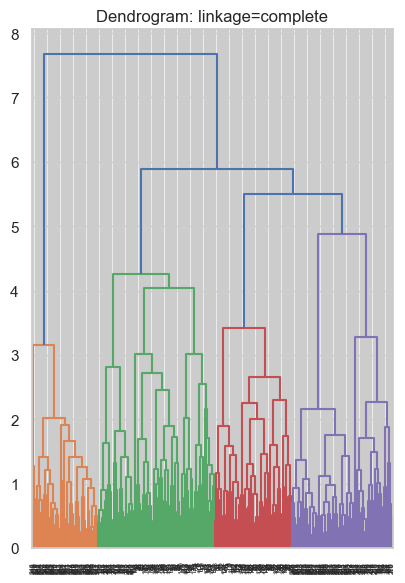

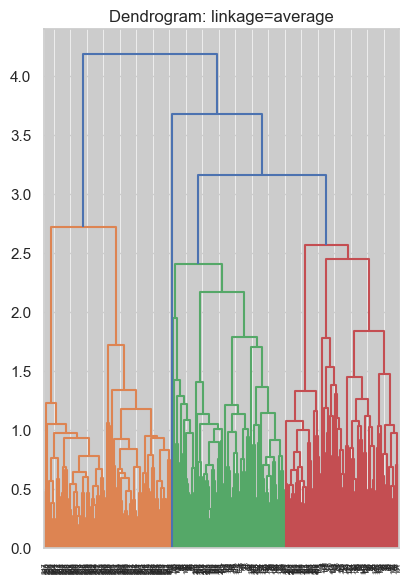

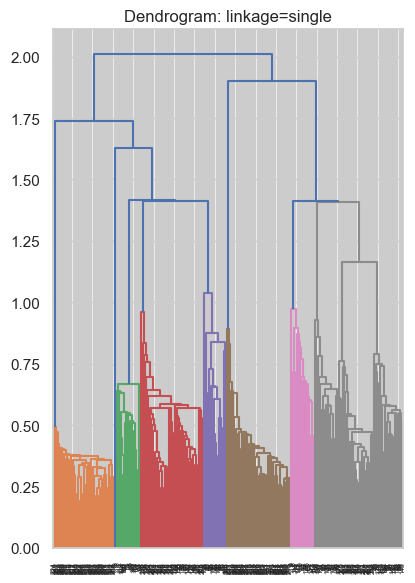

In [21]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram , linkage

linkage_types = ['complete', 'average', 'single']

for linkage_method in linkage_types:
    agglom = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    agglom_labels = agglom.fit_predict(X)
    
    plt.figure(figsize=(8, 6))
    

    # Computing linkage matrix
    Z = linkage(X, method=linkage_method)
    
    # Plotting dendrogram
    plt.subplot(1, 2, 2)
    dendrogram(Z)
    plt.title(f'Dendrogram: linkage={linkage_method}')
    
    plt.tight_layout()
    plt.show()

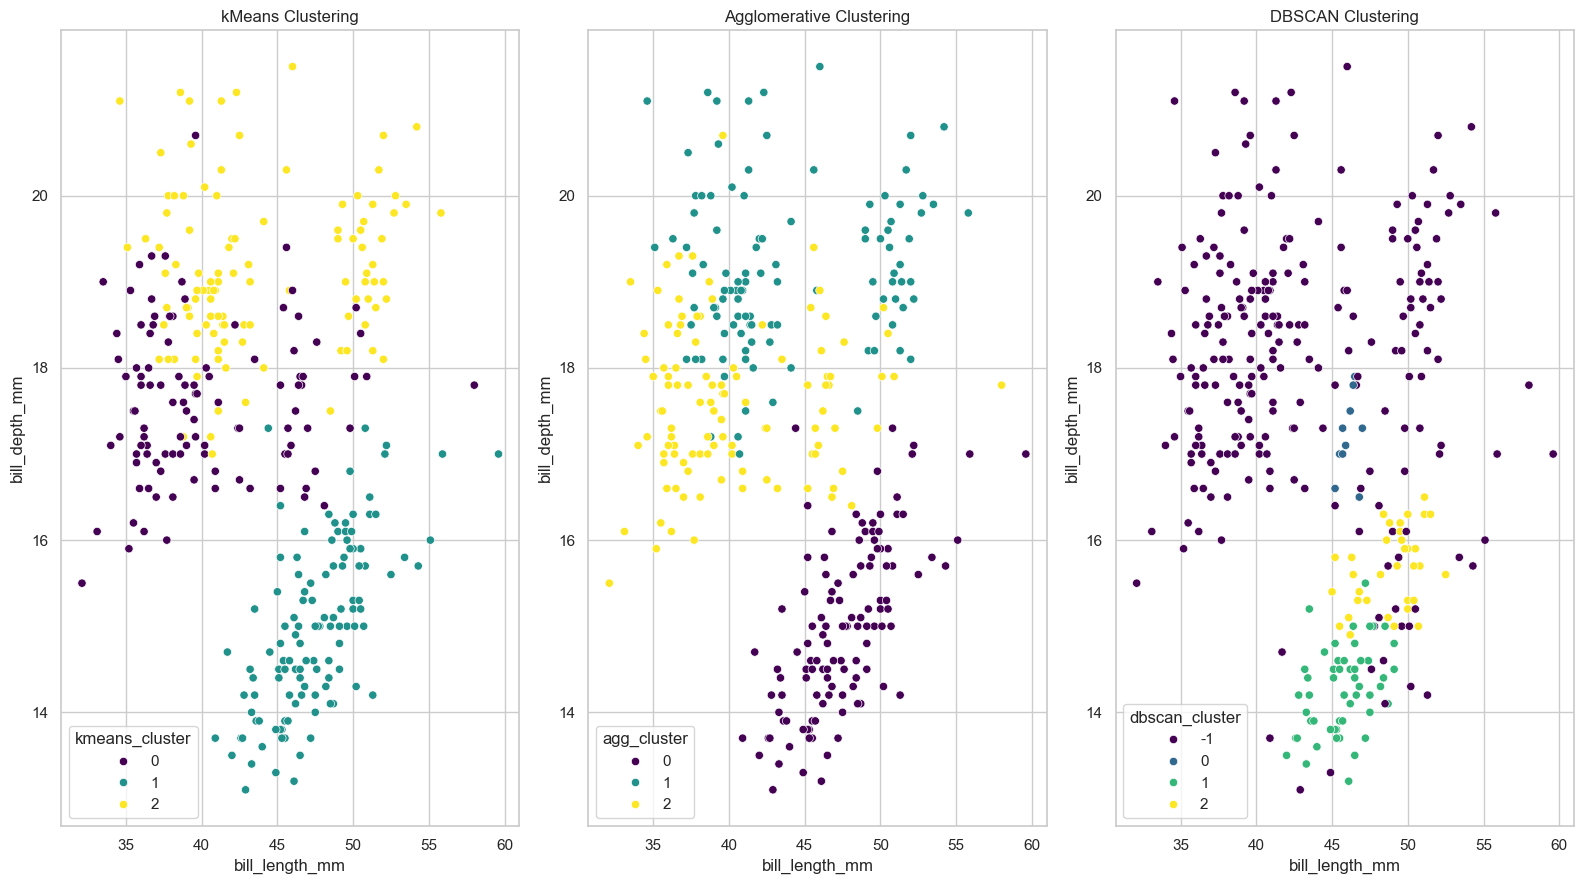

In [32]:


# Visualize clusters using scatter plots
plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='kmeans_cluster', data=penguins, palette='viridis')
plt.title('kMeans Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='agg_cluster', data=penguins, palette='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='dbscan_cluster', data=penguins, palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()